# Najbolj popularna piva na svetu

### Projektna naloga pri predmetu Programiranje 1

V tej projektni nalogi bom analiziral piva s pomočjo podatkov, ki jih bom analiziral s spletne strani https://www.beeradvocate.com/beer/top-rated/, kjer so podatki o 250 svetovno najbolj priljubljenih pivih na svetu.

Postavil sem si štiri hipoteze in sicer:
* med 250 najbolj priljubljenimi pivi je največ piv tipa "IPA" in najmanj piv tipa "PALE ALE"
* več kot polovica piv ima več kot 7% vsebovanost alkohola
* svetlo pivo je bolj priljubljeno od temnega
* največ glasov je prejelo ameriško pivo

Za začetek analize podatkov sem najprej pripravil delovno okolje.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import squarify
from pywaffle import Waffle

piva = pd.read_csv('../beer_ratings/csv_file.csv')

pd.options.display.max_rows = 10

%matplotlib inline

# 1. Predstavitev teme

Piva sem ločil v 7 kategorij. Te so (po vrsti):
* mesto na lestvici (razvrščeno po priljubljenosti)
* ime piva
* pivnice izdelave
* vrsta piva
* stopnja vsebovanosti alkohola v pivu
* število ljudi, ki je glasovalo za poljubno pivo
* povprečna ocena (vsota ocen / število glasov)

In [2]:
piva

,MESTO,IME_PIVA,PIVNICA,VRSTA_PIVA,STOPNJA_ALKOHOLA,ST_GLASOV,AVG_OCENA
0,1,Kentucky Brunch Brand Stout,Toppling Goliath Brewing Company,American Imperial Stout,12.0,784,4.90
1,2,Marshmallow Handjee,3 Floyds Brewing Co.,Russian Imperial Stout,15.0,1696,4.81
2,3,Hunahpu's Imperial Stout - Double Barrel Aged,Cigar City Brewing,American Imperial Stout,11.0,1612,4.79
3,4,Barrel-Aged Abraxas,Perennial Artisan Ales,American Imperial Stout,11.0,1529,4.79
4,5,Heady Topper,The Alchemist,New England IPA,8.0,14621,4.76
...,...,...,...,...,...,...,...
245,246,Scaled Up,Trillium Brewing Company,New England IPA,8.0,934,4.46
246,247,Dragonsaddle,Hoof Hearted Brewing,New England IPA,11.5,338,4.50
247,248,Flora - Blueberry,Hill Farmstead Brewery,Belgian Saison,NaN,256,4.52
248,249,Madagascar,4 Hands Brewing Co.,English Sweet / Milk Stout,9.3,891,4.46


Razpredelnica 250 svetovno najbolj priljubljenih piv, sodeč po spletni strani https://www.beeradvocate.com/beer/top-rated/.

### najbolje ocenjena piva

In [3]:
najboljse_ocene = piva.sort_values('AVG_OCENA', ascending=[False])
najboljse_ocene[0:10]

,MESTO,IME_PIVA,PIVNICA,VRSTA_PIVA,STOPNJA_ALKOHOLA,ST_GLASOV,AVG_OCENA
0,1,Kentucky Brunch Brand Stout,Toppling Goliath Brewing Company,American Imperial Stout,12.0,784,4.90
1,2,Marshmallow Handjee,3 Floyds Brewing Co.,Russian Imperial Stout,15.0,1696,4.81
2,3,Hunahpu's Imperial Stout - Double Barrel Aged,Cigar City Brewing,American Imperial Stout,11.0,1612,4.79
51,52,Very GGGreennn,Tree House Brewing Company,New England IPA,8.3,134,4.79
3,4,Barrel-Aged Abraxas,Perennial Artisan Ales,American Imperial Stout,11.0,1529,4.79
9,10,King JJJuliusss,Tree House Brewing Company,New England IPA,8.4,528,4.78
5,6,King Julius,Tree House Brewing Company,New England IPA,8.3,1090,4.77
11,12,SR-71,Toppling Goliath Brewing Company,American Imperial Stout,14.0,514,4.76
20,21,Zenne Y Frontera,Brouwerij 3 Fonteinen,Belgian Lambic,7.0,296,4.76
8,9,Very Hazy,Tree House Brewing Company,New England IPA,8.6,958,4.76


### piva, v katerih je največ alkohola

In [4]:
najbolj_alkoholizirana = piva.sort_values('STOPNJA_ALKOHOLA', ascending=[False])
najbolj_alkoholizirana[0:10]

,MESTO,IME_PIVA,PIVNICA,VRSTA_PIVA,STOPNJA_ALKOHOLA,ST_GLASOV,AVG_OCENA
110,111,Samuel Adams Utopias,Boston Beer Company (Samuel Adams),American Strong Ale,28.0,2692,4.54
125,126,Black Tuesday - Reserve,The Bruery,American Imperial Stout,20.5,267,4.61
116,117,Grey Monday,The Bruery,American Imperial Stout,19.9,1879,4.54
132,133,Mocha Wednesday,The Bruery,American Imperial Stout,19.9,1454,4.53
60,61,Chocolate Rain,The Bruery,American Imperial Stout,19.6,2816,4.59
56,57,Black Tuesday,The Bruery,American Imperial Stout,19.5,4093,4.59
95,96,A Deal With The Devil,Anchorage Brewing Company,American Barleywine,17.3,1092,4.57
99,100,It Was All A Dream,J. Wakefield Brewing,American Imperial Stout,17.0,127,4.74
212,213,Tweak,Avery Brewing Company,American Imperial Stout,16.0,2638,4.47
79,80,Bourbon Paradise,Prairie Artisan Ales,American Imperial Stout,15.9,503,4.61


### piva, za katera je glasovalo največ ljudi

In [5]:
najbolj_glasovana_piva = piva.sort_values('ST_GLASOV', ascending=[False])
najbolj_glasovana_piva[0:10]

,MESTO,IME_PIVA,PIVNICA,VRSTA_PIVA,STOPNJA_ALKOHOLA,ST_GLASOV,AVG_OCENA
89,90,Breakfast Stout,Founders Brewing Company,American Imperial Stout,8.3,17483,4.55
14,15,Pliny The Elder,Russian River Brewing Company,American Imperial IPA,8.0,15218,4.69
4,5,Heady Topper,The Alchemist,New England IPA,8.0,14621,4.76
26,27,KBS (Kentucky Breakfast Stout),Founders Brewing Company,American Imperial Stout,12.3,13713,4.65
164,165,Hopslam Ale,Bell's Brewery - Eccentric Café & General Store,American Imperial IPA,10.0,13708,4.49
22,23,Bourbon County Brand Stout,Goose Island Beer Co.,American Imperial Stout,14.7,12957,4.66
244,245,Enjoy By IPA,Stone Brewing,American Imperial IPA,9.4,11106,4.44
33,34,Zombie Dust,3 Floyds Brewing Co.,American Pale Ale (APA),6.2,10731,4.63
155,156,Abt 12,Brouwerij St. Bernardus NV,Belgian Quadrupel (Quad),10.0,9989,4.50
94,95,Trappistes Rochefort 10,Brasserie de Rochefort,Belgian Quadrupel (Quad),11.3,9662,4.55


# 2. Analiza podatkov

### 2.1 prva hipoteza
med 250 najbolj priljubljenimi pivi je največ piv tipa "IPA" in najmanj piv tipa "PALE ALE"

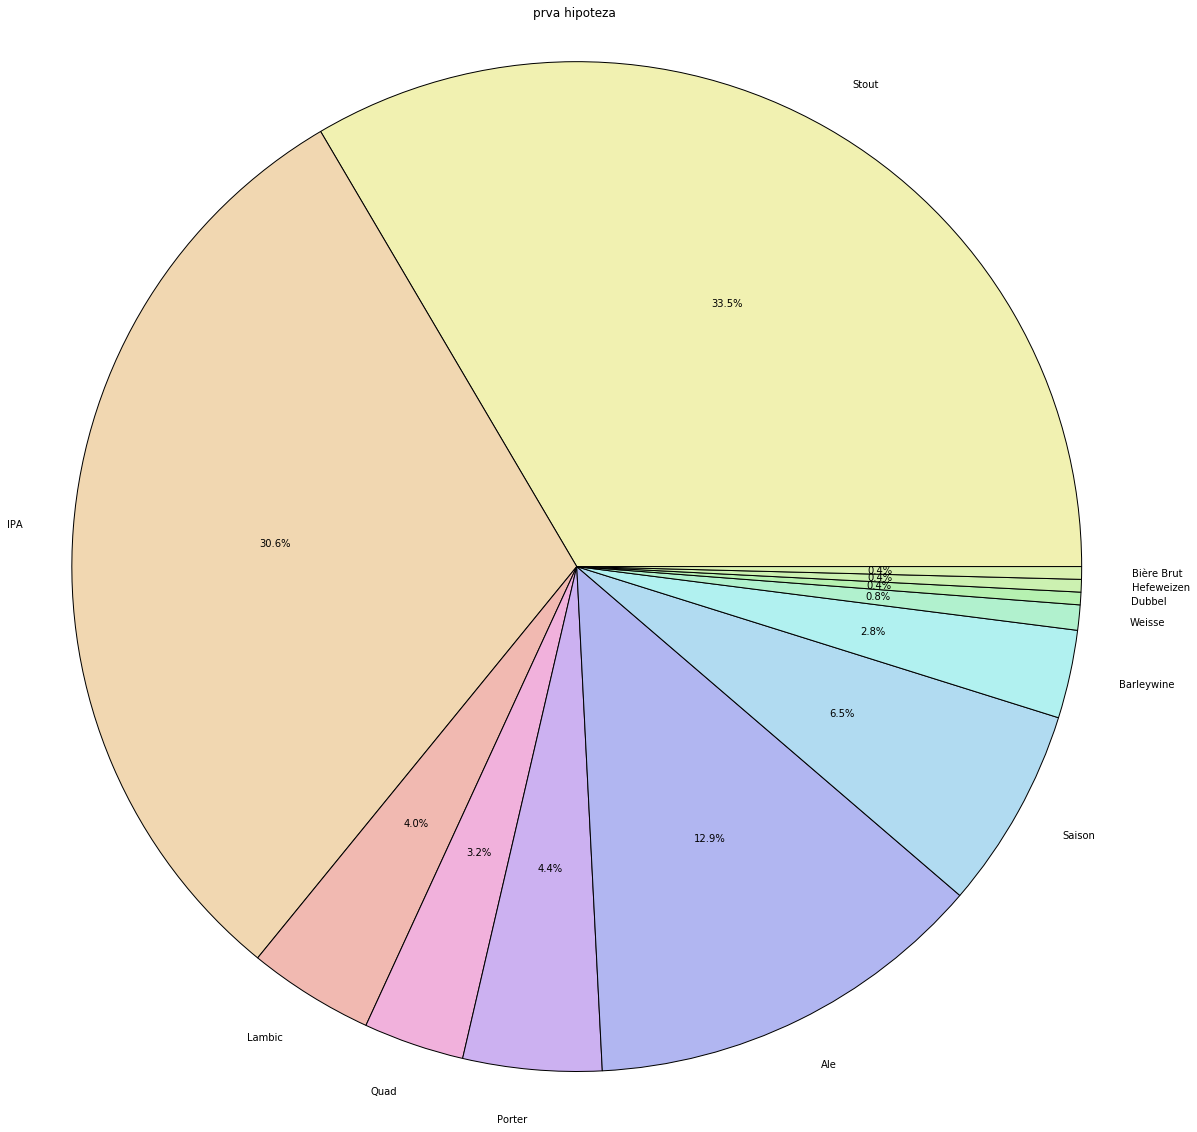

In [6]:
stevilo_tipov = ['Stout', 'IPA', 'Lambic', 'Quad', 'Porter', 'Ale', 'Saison', 'Barleywine', 'Weisse', 'Dubbel', 'Hefeweizen', 'Bière Brut']
vrste_piv = str()
ponovitve_piv = dict()
for vrsta in piva['VRSTA_PIVA']:
    vrste_piv += vrsta + ' '
for tip in stevilo_tipov:
    st_ponovitev = vrste_piv.count(tip)
    ponovitve_piv.update({tip:st_ponovitev})
ponovitve_piv
labels = list(ponovitve_piv.keys())
score = list(ponovitve_piv.values())
colors = ['#f1f1b1','#f1d7b1','#f1b9b1','#f1b1dc', '#ccb1f1', '#b1b6f1', '#b1dbf1', '#b1f1f0', '#b1f1ce', '#b6f1b1','#ccf1b1', '#daf1b1']
plt.pie(score, colors=colors,labels=labels, wedgeprops={'edgecolor':'black'}, autopct='%0.1f%%')
plt.title("prva hipoteza")
fig = plt.gcf()
fig.set_size_inches(20, 20)
plt.axis('equal')
plt.show()

### Rezultat
Iz rezultatov je jasno razvidno, da je bila priljubljenost piv tipa "IPA" rahlo precenjena, priljubljenost piv tipa "ALE" pa precej podcenjena.

### 2.2 druga hipoteza

več kot polovica piv ima vsebovanost alkohola višjo kot 7 %

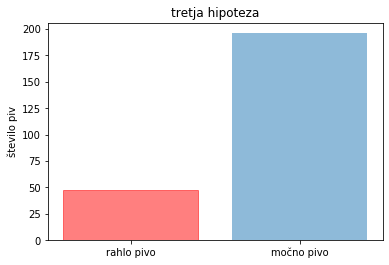

In [7]:
tipi = ['Stout', 'IPA', 'Lambic', 'Quad', 'Porter', 'Ale', 'Saison', 'Barleywine', 'Weisse', 'Dubbel', 'Hefeweizen', 'Bière Brut']
svetla = ['IPA', 'Lambic', 'Ale', 'Saison', 'Weisse', 'Hefeweizen']
temna = ['Stout', 'Quad', 'Porter', 'Barleywine', 'Dubbel', 'Bière Brut']
scounter = 0
slight = 0
sstrong = 0
dcounter = 0
dlight = 0
dstrong = 0

for i in range(251):
    for pivo in tipi:
        try:
            if pivo in piva['VRSTA_PIVA'][i]:
                if pivo in svetla:
                    scounter += 1
                    try:
                        if piva['STOPNJA_ALKOHOLA'][i] <= 7:
                            slight += 1
                        else:
                            sstrong += 1
                    except:
                        pass
                elif pivo in temna:
                    dcounter += 1
                    try:
                        if piva['STOPNJA_ALKOHOLA'][i] <= 7:
                            dlight += 1
                        else:
                            dstrong += 1
                    except:
                        pass
        except:
            pass

kategorije = ['rahlo pivo', 'močno pivo']
število_piv = [slight + dlight, sstrong + dstrong]
barlist = plt.bar(kategorije, število_piv, align='center', alpha=0.5)
barlist[0].set_color('r')
plt.xticks(kategorije)
plt.ylabel('število piv')
plt.title('tretja hipoteza')
plt.show()

### Rezultat
Drugo hipotezo lahko zaradi jasne prevlade piv, s stopnjo alkohola višjo od 7 %, v celoti potrdim.

### 2.3 tretja hipoteza
svetlo pivo je bolj priljubljeno od temnega

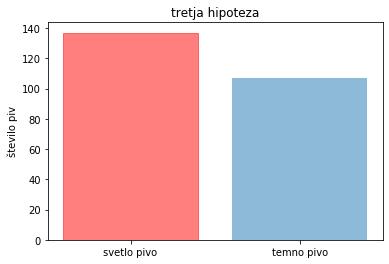

In [8]:
tipi = ['Stout', 'IPA', 'Lambic', 'Quad', 'Porter', 'Ale', 'Saison', 'Barleywine', 'Weisse', 'Dubbel', 'Hefeweizen', 'Bière Brut']
svetla = ['IPA', 'Lambic', 'Ale', 'Saison', 'Weisse', 'Hefeweizen']
temna = ['Stout', 'Quad', 'Porter', 'Barleywine', 'Dubbel', 'Bière Brut']
scounter = 0
dcounter = 0

for i in range(251):
    for pivo in tipi:
        try:
            if pivo in piva['VRSTA_PIVA'][i]:
                if pivo in svetla:
                    scounter += 1
                elif pivo in temna:
                    dcounter += 1
        except:
            pass
kategorije = ['svetlo pivo', 'temno pivo']
število_piv = [scounter, dcounter]
barlist = plt.bar(kategorije, število_piv, align='center', alpha=0.5)
barlist[0].set_color('r')
plt.xticks(kategorije)
plt.ylabel('število piv')
plt.title('tretja hipoteza')
plt.show()

### Rezultat
Tretjo hipotezo lahko potrdim, čeprav se je temno pivo izkazalo za veliko bolj priljubljenega, kot sem prvotno pričakoval.

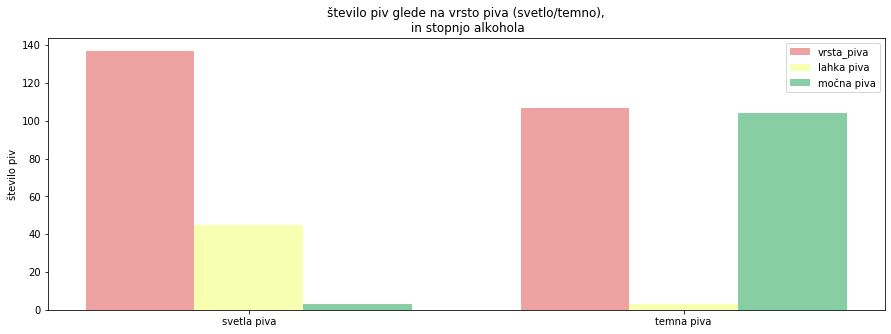

In [9]:
tipi = ['Stout', 'IPA', 'Lambic', 'Quad', 'Porter', 'Ale', 'Saison', 'Barleywine', 'Weisse', 'Dubbel', 'Hefeweizen', 'Bière Brut']
svetla = ['IPA', 'Lambic', 'Ale', 'Saison', 'Weisse', 'Hefeweizen']
temna = ['Stout', 'Quad', 'Porter', 'Barleywine', 'Dubbel', 'Bière Brut']
scounter = 0
slight = 0
sstrong = 0
dcounter = 0
dlight = 0
dstrong = 0

for i in range(251):
    for pivo in tipi:
        try:
            if pivo in piva['VRSTA_PIVA'][i]:
                if pivo in svetla:
                    scounter += 1
                    try:
                        if piva['STOPNJA_ALKOHOLA'][i] <= 7:
                            slight += 1
                        else:
                            sstrong += 1
                    except:
                        pass
                elif pivo in temna:
                    dcounter += 1
                    try:
                        if piva['STOPNJA_ALKOHOLA'][i] <= 7:
                            dlight += 1
                        else:
                            dstrong += 1
                    except:
                        pass
        except:
            pass
        
labels = ['svetla piva', 'temna piva']
vrsta_piva = [scounter, dcounter]
lahka = [slight, dlight]
močna = [dlight, dstrong]
x = np.arange(2)
width = 0.25
fig, ax = plt.subplots(figsize=(15, 5))
rects1 = ax.bar(x - 0.25, vrsta_piva, width, color='#e14646', label='vrsta_piva', alpha=0.5)
rects2 = ax.bar(x, lahka, width, color='#f1ff65', label='lahka piva', alpha=0.5)
rects3 = ax.bar(x + 0.25, močna, width, color='#129e4d', label='močna piva', alpha=0.5)
ax.set_ylabel('število piv')
ax.set_title('število piv glede na vrsto piva (svetlo/temno),\n in stopnjo alkohola')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()

Drugo in tretjo hipotezo sem združil v skupen graf, za bolj nazoren prikaz. Poleg potrjene druge in tretje hipoteze je lepo prikazana tudi korelacija med vrsto piva in stopnjo vsebovanega alkohola. Svetlo pivo je navadno lažje od temnega, kot je tudi nazorno prikazano na tem grafu.

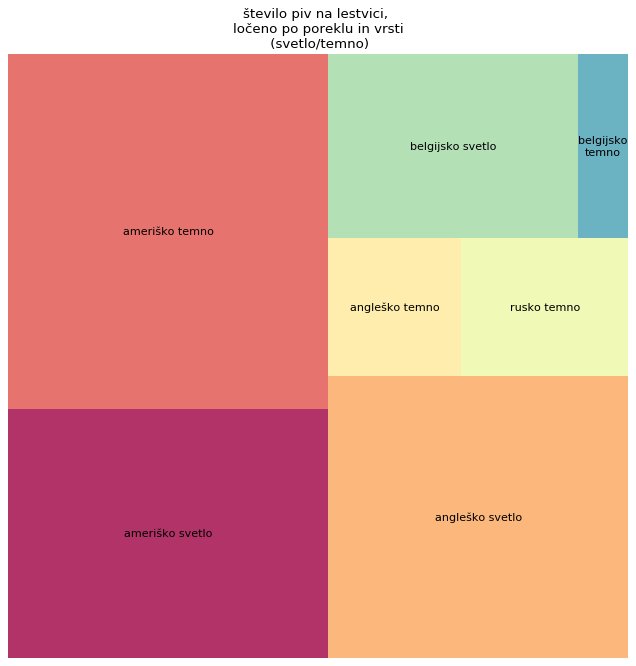

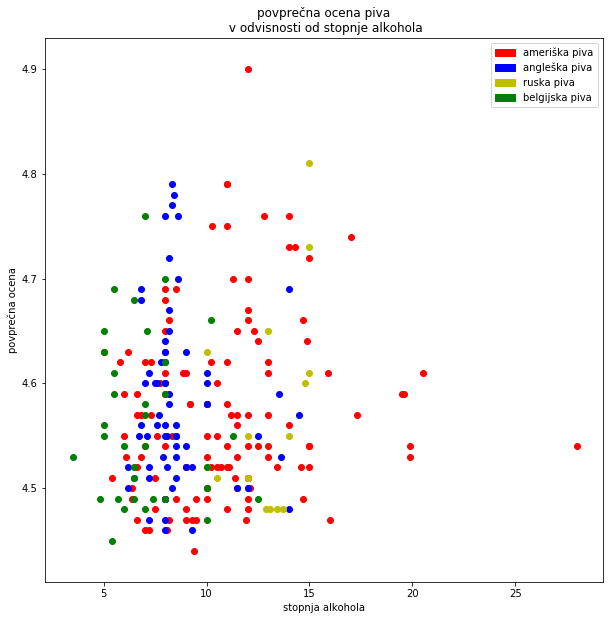

In [10]:
tipi = ['Stout', 'IPA', 'Lambic', 'Quad', 'Porter', 'Ale', 'Saison', 'Barleywine', 'Weisse', 'Dubbel', 'Hefeweizen', 'Bière Brut']
svetla = ['IPA', 'Lambic', 'Ale', 'Saison', 'Weisse', 'Hefeweizen']
temna = ['Stout', 'Quad', 'Porter', 'Barleywine', 'Dubbel', 'Bière Brut']

države = ['American', 'British', 'English', 'England','Russian']

am_light = 0
am_dark = 0
brit_light = 0
brit_dark = 0
russ_light = 0
russ_dark = 0
belg_light = 0
belg_dark = 0

am_alko = list()
am_avg = list()
brit_alko = list()
brit_avg = list()
russ_alko = list()
russ_avg = list ()
belg_alko = list()
belg_avg = list()

for i in range(251):
    for pivo in tipi:
        try:
            if pivo in piva['VRSTA_PIVA'][i]:
                if pivo in svetla:
                    if 'American' in piva['VRSTA_PIVA'][i]:
                        am_light += 1
                        am_alko.append(piva['STOPNJA_ALKOHOLA'][i])
                        am_avg.append(piva['AVG_OCENA'][i])
                    elif 'British' in piva['VRSTA_PIVA'][i] or 'English' in piva['VRSTA_PIVA'][i] or 'England' in piva['VRSTA_PIVA'][i]:
                        brit_light += 1
                        brit_alko.append(piva['STOPNJA_ALKOHOLA'][i])
                        brit_avg.append(piva['AVG_OCENA'][i])
                    elif 'Russian' in piva['VRSTA_PIVA'][i]:
                        russ_light += 1
                        russ_alko.append(piva['STOPNJA_ALKOHOLA'][i])
                        russ_avg.append(piva['AVG_OCENA'][i])
                    else:
                        belg_light += 1
                        belg_alko.append(piva['STOPNJA_ALKOHOLA'][i])
                        belg_avg.append(piva['AVG_OCENA'][i])
                elif pivo in temna:
                    if 'American' in piva['VRSTA_PIVA'][i]:
                        am_dark += 1
                        am_alko.append(piva['STOPNJA_ALKOHOLA'][i])
                        am_avg.append(piva['AVG_OCENA'][i])
                    elif 'British' in piva['VRSTA_PIVA'][i] or 'English' in piva['VRSTA_PIVA'][i] or 'England' in piva['VRSTA_PIVA'][i]:
                        brit_dark += 1
                        brit_alko.append(piva['STOPNJA_ALKOHOLA'][i])
                        brit_avg.append(piva['AVG_OCENA'][i])
                    elif 'Russian' in piva['VRSTA_PIVA'][i]:
                        russ_dark += 1
                        russ_alko.append(piva['STOPNJA_ALKOHOLA'][i])
                        russ_avg.append(piva['AVG_OCENA'][i])
                    else:
                        belg_dark += 1
                        belg_alko.append(piva['STOPNJA_ALKOHOLA'][i])
                        belg_avg.append(piva['AVG_OCENA'][i])
        except:
            pass
        
#količina = [am_light, am_dark, brit_light, brit_dark, russ_light, russ_dark, belg_light, belg_dark]
#države_tip = ['ameriško svetlo', 'ameriško temno', 'angleško svetlo', 'angleško temno', 'rusko svetlo', 'rusko temno', 'belgijsko svetlo', 'belgijsko temno']
#plt.figure(figsize=(12.5, 5))
#barlist = plt.bar(države_tip, količina, alpha=0.5, width=0.25)
#barlist[0].set_color('#ff8a71')
#barlist[1].set_color('#ff0101')
#barlist[2].set_color('#8be1e3')
#barlist[3].set_color('#0120ff')
#barlist[4].set_color('y')
#barlist[5].set_color('#ffff01')
#barlist[6].set_color('#79d6a5')
#barlist[7].set_color('#0aa151')
#plt.title('število piv na lestvici, \nločeno po poreklu in vrsti\n (svetlo/temno)')
#plt.xlabel('vrste piv')
#plt.ylabel('število piv')
#plt.show()

sizes = [am_light, am_dark, brit_light, brit_dark, russ_dark, belg_light, belg_dark]
labels = ['ameriško svetlo', 'ameriško temno', 'angleško svetlo', 'angleško temno', 'rusko temno','belgijsko svetlo', 'belgijsko\ntemno']
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(sizes))]
plt.figure(figsize=(10,10), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color = colors, alpha=.8)
plt.title('število piv na lestvici, \nločeno po poreklu in vrsti\n (svetlo/temno)')
plt.axis('off')
plt.show()

plt.figure(figsize=(10, 10))
X1= np.array(am_alko)
Y1= np.array(am_avg)
X2= np.array(brit_alko)
Y2= np.array(brit_avg)
X3= np.array(russ_alko)
Y3= np.array(russ_avg)
X4= np.array(belg_alko)
Y4= np.array(belg_avg)
plt.scatter(X1,Y1, color = 'r')
plt.scatter(X2,Y2, color = 'b')
plt.scatter(X3,Y3, color = 'y')
plt.scatter(X4,Y4, color = 'g')
am_legend = mpatches.Patch(color='r', label='ameriška piva')
brit_legend = mpatches.Patch(color='b', label='angleška piva')
russ_legend = mpatches.Patch(color='y', label='ruska piva')
belg_legend = mpatches.Patch(color='g', label='belgijska piva')
plt.xlabel('stopnja alkohola')
plt.ylabel('povprečna ocena')
plt.legend(handles=[am_legend, brit_legend, russ_legend, belg_legend])
plt.title('povprečna ocena piva\n v odvisnosti od stopnje alkohola')
plt.show()

### 2.4 četrta hipoteza
za ameriška piva je glasovalo največ ljudi

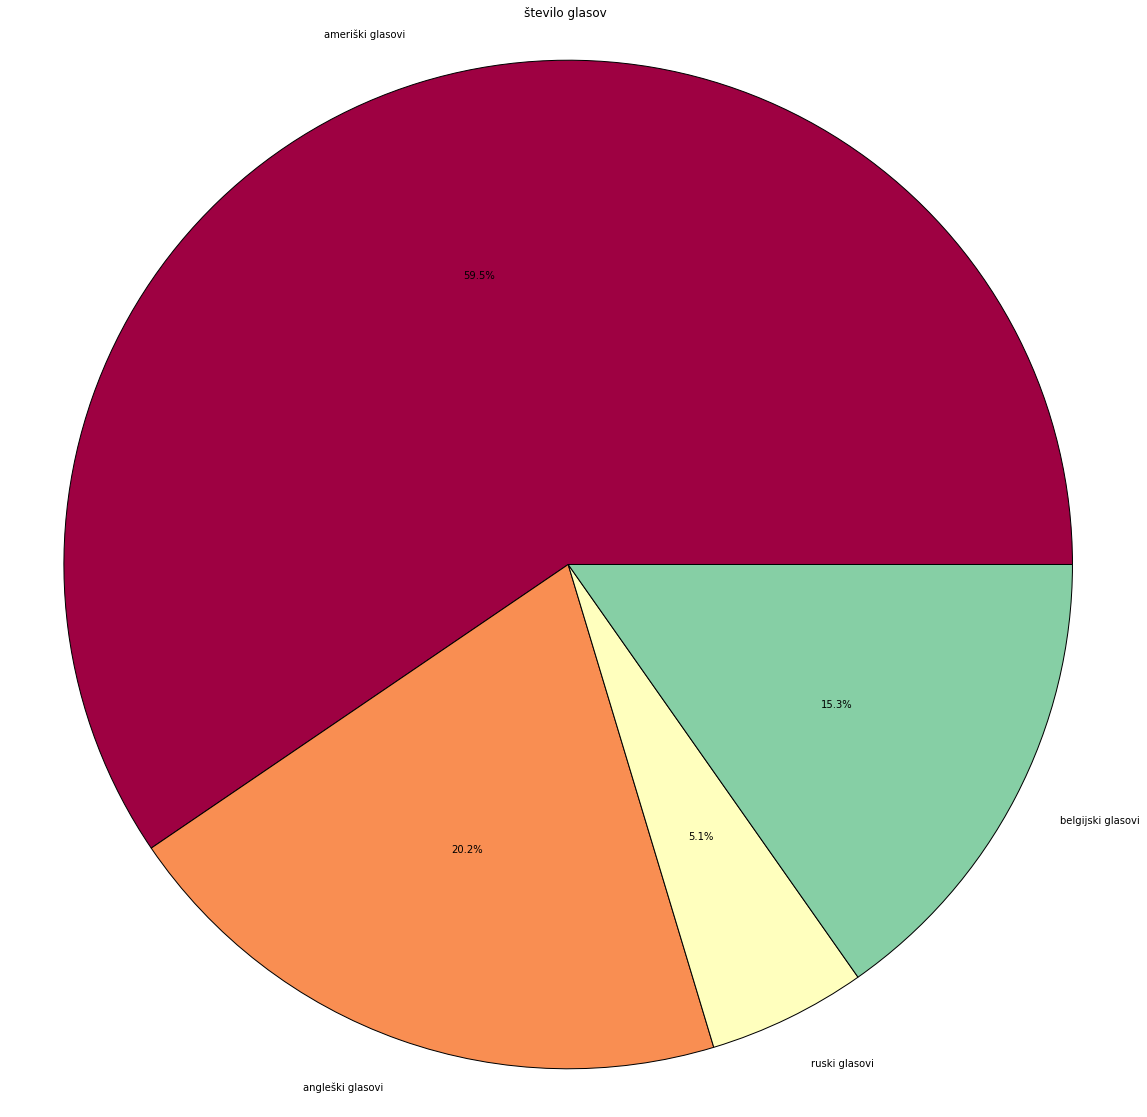

In [15]:
am_votes = 0
am_counter = 0
brit_votes = 0
brit_counter = 0
russ_votes = 0
russ_counter = 0
belg_votes = 0
belg_counter = 0
for i in range(251):
    try:
        if 'American' in piva['VRSTA_PIVA'][i]:
            am_votes += piva['ST_GLASOV'][i]
            am_counter += 1
        elif 'British' in piva['VRSTA_PIVA'][i] or 'English' in piva['VRSTA_PIVA'][i] or 'England' in piva['VRSTA_PIVA'][i]:
            brit_votes += piva['ST_GLASOV'][i]
            brit_counter += 1
        elif 'Russian' in piva['VRSTA_PIVA'][i]:
            russ_votes += piva['ST_GLASOV'][i]
            russ_counter += 1
        else:
            belg_votes += piva['ST_GLASOV'][i]
            belg_counter += 1
    except:
        pass
am_votes, am_counter, brit_votes, brit_counter, russ_votes, russ_counter, belg_votes, belg_counter

labels = ['ameriški glasovi', 'angleški glasovi', 'ruski glasovi', 'belgijski glasovi']
score = [am_votes, brit_votes, russ_votes, belg_votes]
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(5)]
plt.pie(score, colors=colors,labels=labels, wedgeprops={'edgecolor':'black'}, autopct='%0.1f%%')
plt.title("število glasov")
fig = plt.gcf()
fig.set_size_inches(20, 20)
plt.axis('equal')
plt.show()

In [ ]:

labels = ['ameriški volilci', 'angleški volilci', 'ruski volilci', 'belgijski volilci']
score = [am_counter, brit_counter, russ_counter, belg_counter]
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(5)]
plt.pie(score, colors=colors,labels=labels, wedgeprops={'edgecolor':'black'}, autopct='%0.1f%%')
plt.title("število glasov")
fig = plt.gcf()
fig.set_size_inches(20, 20)
plt.axis('equal')
plt.show()

# Zaključek